# To better understand how it works svm

## Diagonalization of  4x4 matrix. Wrong tentative. 
The first part was a tentative (wrong). I thought one could just take into account the ground 
state at each step of basis expansion, but it doesn't work like that; I need to calculate **all**
the previous eigenvalues. Look after.... 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

This is the matrix to be diagonalized

In [2]:
a = np.matrix('2 2 3 2; 1 3 2 1; 7 2 6 1; 8 7 1 3 ')
a = a + a.transpose()

this is what the matrix looks like

In [3]:
a

matrix([[ 4,  3, 10, 10],
        [ 3,  6,  4,  8],
        [10,  4, 12,  2],
        [10,  8,  2,  6]])

The diagonalization of the matrix

In [4]:
e, w = np.linalg.eig(a)


In [5]:
e

array([25.85878979, -8.27630761,  1.56435331,  8.85316451])

In [6]:
np.sort(e)

array([-8.27630761,  1.56435331,  8.85316451, 25.85878979])

In [7]:
a

matrix([[ 4,  3, 10, 10],
        [ 3,  6,  4,  8],
        [10,  4, 12,  2],
        [10,  8,  2,  6]])

In [8]:
w

matrix([[ 0.5361151 ,  0.68213298, -0.49285206, -0.06612146],
        [ 0.3910662 ,  0.27942614,  0.75150529,  0.45191599],
        [ 0.56968669, -0.33357743,  0.25289347, -0.70726803],
        [ 0.48487617, -0.58765783, -0.3583037 ,  0.5396034 ]])

In [9]:
a*w[:,0]/w[:,0]

matrix([[25.85878979],
        [25.85878979],
        [25.85878979],
        [25.85878979]])

Here we introduce two vectors $\phi_1$ and $\phi_2$. The second 
is orthonormalized 

In [10]:
phi1 = np.matrix([1,0,0,0])
print (phi1.dot(phi1.T))
e1 = phi1*a*phi1.T
e1 = e1[0,0]

[[1]]


In [11]:
psi2 = np.matrix([2,3,0,0])
n=psi2.dot(psi2.T)[0,0]
p=psi2.dot(phi1.T)[0,0]

In [12]:
phi2 = (psi2 - phi1*p)/ np.sqrt(n - p**2)

In [13]:
phi2

matrix([[0., 1., 0., 0.]])

In [14]:
h1 = phi1*a*phi2.T
h1 = h1[0,0]

In [15]:
h1

3.0

In [16]:
h2 = phi2*a*phi2.T
h2 = h2[0,0,]

In [17]:
h2


6.0

An we use the new vectors to sample the original matrix

In [18]:
hr = np.matrix([[e1,h1],[h1,h2]])

So the matrix is now 2x2

In [19]:
hr

matrix([[4., 3.],
        [3., 6.]])

And we can diagonalize it

In [20]:
np.linalg.eig(hr)

(array([1.83772234, 8.16227766]), matrix([[-0.81124219, -0.58471028],
         [ 0.58471028, -0.81124219]]))

In [21]:
e2 = 1.83772234

In [22]:
e1

4

Below I add a new vector and try to find the original eigenvalues but I was mistaken ... I thought one could work with 
only the ground state and but it's not true.... 
Every time one find the best candidate to enlarge the basis, one should recalculate all the eigenvalues ... 

In [23]:
phi3 = np.matrix([[ 0.,  0,  1.,  0.]])

In [24]:
h1 = phi1*a*phi3.T
h1 = h1[0,0]

In [25]:
h2 = phi2*a*phi3.T
h2 = h2[0,0]

In [26]:
h3 = phi3*a*phi3.T
h3 = h3[0,0]

In [27]:
hr = np.matrix([[e1,0,h1],[0,e2,h2], [h1,h2,h3]])

In [28]:
np.linalg.eig(hr)

(array([19.40308805, -3.75524172,  2.18987601]),
 matrix([[-0.53486   , -0.72375154,  0.43601433],
         [-0.18760772, -0.40142351, -0.89647226],
         [-0.82384957,  0.56128681, -0.078924  ]]))

In [29]:
e3 = -3.75524172

In [30]:
phi4 = np.matrix([[ 0.,  0,  0,  1]])
h1 = phi1*a*phi4.T
h1 = h1[0,0]
h2 = phi2*a*phi4.T
h2 = h2[0,0]
h3 = phi3*a*phi4.T
h3 = h3[0,0]
h4 = phi4*a*phi4.T
h4 = h4[0,0]

In [31]:
hr = np.matrix([[e1,0,0,h1],[0,e2,0,h2], [0,0,e3,h3],[h1,h2,h3,h4]])
hr

matrix([[ 4.        ,  0.        ,  0.        , 10.        ],
        [ 0.        ,  1.83772234,  0.        ,  8.        ],
        [ 0.        ,  0.        , -3.75524172,  2.        ],
        [10.        ,  8.        ,  2.        ,  6.        ]])

In [32]:
np.linalg.eig(hr)

(array([17.6003186 ,  2.70835228, -8.72391996, -3.50227031]),
 matrix([[-0.54698198, -0.64190672,  0.51230388, -0.1622073 ],
         [-0.37755857,  0.76185512,  0.49375   , -0.18231081],
         [-0.06966925,  0.02565499,  0.26238421,  0.96210319],
         [-0.74391292,  0.08291174, -0.65185136,  0.1216923 ]]))

In [33]:
e4 =  -8.72391996

## This is the way it works for the calculation of the new eigenvalues for a quasi-diagonal matrix  

Basis definition

In [34]:
phi1

matrix([[1, 0, 0, 0]])

In [35]:
phi2

matrix([[0., 1., 0., 0.]])

In [36]:
phi3

matrix([[0., 0., 1., 0.]])

In [37]:
phi4

matrix([[0., 0., 0., 1.]])

In [38]:
import scipy.optimize as opt

Quasi diagonal matrix

In [39]:
h = np.matrix([[-2,0,0,0,4],[0,-1,0,0,2],[0,0,-3,0,5],[0,0,0,-6,3],[4,2,5,3,4]])

In [40]:
h

matrix([[-2,  0,  0,  0,  4],
        [ 0, -1,  0,  0,  2],
        [ 0,  0, -3,  0,  5],
        [ 0,  0,  0, -6,  3],
        [ 4,  2,  5,  3,  4]])

In [41]:
e,v = np.linalg.eig(h)

In [42]:
np.sort(h.diagonal())

matrix([[-6, -3, -2, -1,  4]])

Eigenvalues of the matrix calculated in the usual way

In [43]:
np.sort(e)

array([-8.16176143, -5.04495992, -2.35730491, -1.10520983,  8.6692361 ])

This is the function for which we have to find the zeros in order to calculate the new eigenvalues.
It uses the old diagonal elements of the matrix (previous step)

In [44]:
def funzioneE (x) :
    e = h.diagonal()
    hi = h[0:-1,-1]
    f=0
    d1, d2 = h.shape
    for i in range(d1-1) : 
        f += h[i,-1]**2/(x-h[i,i])
    f -= x-h[-1,-1]
    return f
        

In [45]:
funzioneE(2)

13.458333333333332

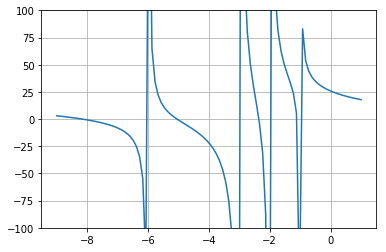

In [46]:
x = np.linspace(-9,1,100)
fig = plt.plot(x,funzioneE(x))
plt.ylim(-100,100)
plt.grid()

The expected values are 

In [47]:
np.sort(e)

array([-8.16176143, -5.04495992, -2.35730491, -1.10520983,  8.6692361 ])

And the calculated with thew new methods are the same! 

In [48]:
sol = opt.root(funzioneE,-1.1)
print(sol.x)

[-1.10520983]


In [49]:
sol = opt.root(funzioneE,-5)
print(sol.x)

[-5.04495992]


In [50]:
sol = opt.root(funzioneE,-8)
print(sol.x)

[-8.16176143]


In [51]:
sol = opt.root(funzioneE,-2.1)
print(sol.x)

[-2.35730491]


In [52]:
sol = opt.root(funzioneE,8)
print(sol.x)

[8.6692361]


# How to construct the eigenvectors  - Closer to the real calculation

## This is the original matrix (hamiltonian)

In [53]:
a

matrix([[ 4,  3, 10, 10],
        [ 3,  6,  4,  8],
        [10,  4, 12,  2],
        [10,  8,  2,  6]])

In [54]:
e, u = np.linalg.eig(a)

In [55]:
e

array([25.85878979, -8.27630761,  1.56435331,  8.85316451])

In [56]:
u 

matrix([[ 0.5361151 ,  0.68213298, -0.49285206, -0.06612146],
        [ 0.3910662 ,  0.27942614,  0.75150529,  0.45191599],
        [ 0.56968669, -0.33357743,  0.25289347, -0.70726803],
        [ 0.48487617, -0.58765783, -0.3583037 ,  0.5396034 ]])

## Let us consider that we solved the $3\times 3$ problem

In [57]:
a3 = a[0:3,0:3]

In [58]:
e3, u3 = np.linalg.eig(a3)

In [59]:
u3

matrix([[ 0.53282777,  0.83174746,  0.1558548 ],
        [ 0.32586497, -0.03169841, -0.94488477],
        [ 0.78096516, -0.55424847,  0.28792716]])

In [60]:
e3

array([20.49172017, -2.77799475,  4.28627458])

## Creation of the matrix quasi-diagonal $4\times 4$

In [61]:
phi4 = np.array(np.random.rand(4))
print(phi4)

[0.56033863 0.12450493 0.0615972  0.45912034]


In [62]:
n = np.array([0.,0.,0.,0.])
phi1 = np.array(u3[:,0]).flatten()
phi1 = np.append(phi1,0)
n[0] = phi1.dot(phi4)

phi2 = np.array(u3[:,1]).flatten()
phi2 = np.append(phi2,0)
n[1] = phi2.dot(phi4)

phi3 = np.array(u3[:,2]).flatten()
phi3 = np.append(phi3,0)
n[2] = phi3.dot(phi4)

n[3] = phi4.dot(phi4)

phi4 -= phi1 * n[0]
phi4 -= phi2 * n[1]
phi4 -= phi3 * n[2]

phi4 /= np.sqrt(n[3]-n[0]**2 -n[1]**2 -n[2]**2)

print(n)
print(phi4)



[ 0.38724105  0.42797347 -0.01257584  0.54406656]
[ 4.75129199e-16 -2.94712346e-16  1.66247990e-16  1.00000000e+00]


In [63]:
hi = np.array([0.,0.,0.,0.])
p= phi1*a*phi4.reshape(4,1)
hi[0] = p[0,0]
p= phi2*a*phi4.reshape(4,1)
hi[1] = p[0,0]
p= phi3*a*phi4.reshape(4,1)
hi[2] = p[0,0]
p= phi4*a*phi4.reshape(4,1)
hi[3] = p[0,0]


### This is the quasi-hamiltonian 

In [64]:
h=np.array(np.zeros(shape=(4,4)))
for i in range(3) :
    h[i,i]= e3[i]
    h[3,i]= hi[i]
    h[i,3] = hi[i]
h[3,3] = hi[3]
print(h)

[[20.49172017  0.          0.          9.49712783]
 [ 0.         -2.77799475  0.          6.95539039]
 [ 0.          0.          4.28627458 -5.42467581]
 [ 9.49712783  6.95539039 -5.42467581  6.        ]]


### The diagonalization using the simple root-finding

In [65]:
def fe(x) :
    f = x - hi[3]
    for i in range(3) :
        f -= hi[i]**2/(x-e3[i])
    return f

In [66]:
enew = []
for i in range(3) :
    sol = opt.root(fe,e3[i]-0.1)
    enew = np.append(enew,sol.x)

### calculation and comparison with the previous-step eigenvalues 

In [67]:
sol = opt.root(fe,26)
enew = np.append(enew,sol.x)

print(enew)
print(e3)

[ 8.85316451 -8.27630761  1.56435331 25.85878979]
[20.49172017 -2.77799475  4.28627458]


These are the original eigenvalues: it works !

In [68]:
e

array([25.85878979, -8.27630761,  1.56435331,  8.85316451])

Calculation of the eigenvectors. They are not normalized 

In [69]:
cij = np.array(np.zeros(shape=(4,4)))
for i in range(4) :
    for j in range(3) :
        cij[i,3] += hi[j]**2 / (enew[i] - e3[j])
    cij[i,3] /= enew[i]-hi[3]

print(cij) 

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [70]:
for i in range(4) :
    for j in range(3) :
        cij[i,j] = hi[j]/(enew[i]-e3[j]) * cij[i,3]
print(cij)

[[-0.81600571  0.59799632 -1.18782714  1.        ]
 [-0.33012787 -1.26500448  0.43181216  1.        ]
 [-0.50176699  1.60175792  1.99295838  1.        ]
 [ 1.76951828  0.24288308 -0.25146237  1.        ]]


In [71]:
np.dot(h,cij[3])/cij[3]

array([25.85878979, 25.85878979, 25.85878979, 25.85878979])

This is just to check that it really works

In [72]:
e4,w4 = np.linalg.eig(h)

In [73]:
print(w4)
print(e4)
np.dot(h,w4[:,0])/w4[:,0]

[[ 0.85799725  0.19400223  0.44031945  0.17978497]
 [ 0.11776822  0.74338979 -0.32268084 -0.57391579]
 [-0.12192811 -0.2537578   0.64095556 -0.71408437]
 [ 0.48487617 -0.58765783 -0.5396034  -0.3583037 ]]
[25.85878979 -8.27630761  8.85316451  1.56435331]


array([25.85878979, 25.85878979, 25.85878979, 25.85878979])

In [74]:
print(w4[:,0] / cij[3] * np.linalg.norm(cij[3]))
print(cij[3]/np.linalg.norm(cij[3]))

[1. 1. 1. 1.]
[ 0.85799725  0.11776822 -0.12192811  0.48487617]


In [75]:
print(w4.T)

[[ 0.85799725  0.11776822 -0.12192811  0.48487617]
 [ 0.19400223  0.74338979 -0.2537578  -0.58765783]
 [ 0.44031945 -0.32268084  0.64095556 -0.5396034 ]
 [ 0.17978497 -0.57391579 -0.71408437 -0.3583037 ]]


In [76]:
u3
np.dot(a3,u3[:,0])/u3[:,0]

matrix([[20.49172017],
        [20.49172017],
        [20.49172017]])

Riorder of the eigenfunctions from the lower to the higher eigenvalue

In [77]:
print(e4)
print(enew)

[25.85878979 -8.27630761  8.85316451  1.56435331]
[ 8.85316451 -8.27630761  1.56435331 25.85878979]


In [78]:
cijTmp = np.matrix([w4.T[2],w4.T[1],w4.T[3],w4.T[0]])
print(cijTmp)

[[ 0.44031945 -0.32268084  0.64095556 -0.5396034 ]
 [ 0.19400223  0.74338979 -0.2537578  -0.58765783]
 [ 0.17978497 -0.57391579 -0.71408437 -0.3583037 ]
 [ 0.85799725  0.11776822 -0.12192811  0.48487617]]


In [79]:
oldcij = np.vstack((u3.T,[0,0,0]))
oldcij = np.hstack((oldcij,[[0],[0],[0],[1]]))

In [80]:
print(oldcij)


[[ 0.53282777  0.32586497  0.78096516  0.        ]
 [ 0.83174746 -0.03169841 -0.55424847  0.        ]
 [ 0.1558548  -0.94488477  0.28792716  0.        ]
 [ 0.          0.          0.          1.        ]]


In [81]:
np.linalg.norm(oldcij[2])

1.0

In [82]:
cijTmp*oldcij

matrix([[ 0.06612146, -0.45191599,  0.70726803, -0.5396034 ],
        [ 0.68213298,  0.27942614, -0.33357743, -0.58765783],
        [-0.49285206,  0.75150529,  0.25289347, -0.3583037 ],
        [ 0.5361151 ,  0.3910662 ,  0.56968669,  0.48487617]])

In [83]:
u

matrix([[ 0.5361151 ,  0.68213298, -0.49285206, -0.06612146],
        [ 0.3910662 ,  0.27942614,  0.75150529,  0.45191599],
        [ 0.56968669, -0.33357743,  0.25289347, -0.70726803],
        [ 0.48487617, -0.58765783, -0.3583037 ,  0.5396034 ]])

In [84]:
print(e)
print(enew)

[25.85878979 -8.27630761  1.56435331  8.85316451]
[ 8.85316451 -8.27630761  1.56435331 25.85878979]


In [85]:
print(u.T[[3,1,2,0]])

[[-0.06612146  0.45191599 -0.70726803  0.5396034 ]
 [ 0.68213298  0.27942614 -0.33357743 -0.58765783]
 [-0.49285206  0.75150529  0.25289347 -0.3583037 ]
 [ 0.5361151   0.3910662   0.56968669  0.48487617]]


It seems to work... we only have a sign problem on the first row... but does it matter?

## Example of diagonalization with a non-orthonormal basis (like gaussian) 

Let us introduce three non-orthonormal vectors. We will define the hamiltonian with respect to them.
We also define the overlap matrix, or the metric 

In [86]:
g = np.matrix( np.zeros((3,3)) )
base = np.matrix('1 2 1; 0 1 1; 1 1 1')
base = base.transpose()
for i in range(3) :
    for j in range(3) :
        g[i,j] = np.dot(base[:,i].transpose(),base[:,j])[0,0]   

In [87]:
g

matrix([[6., 3., 4.],
        [3., 2., 2.],
        [4., 2., 3.]])

In [88]:
sig,d = np.linalg.eig(g)

In [89]:
sig

array([10.33185141,  0.21234689,  0.45580169])

In [90]:
d

matrix([[ 0.75578934,  0.63178128,  0.17214786],
        [ 0.39711255, -0.23319198, -0.88765034],
        [ 0.52065737, -0.73923874,  0.42713229]])

In [91]:
d.transpose()*g*d

matrix([[ 1.03318514e+01,  3.13796899e-15,  4.89792114e-16],
        [ 2.36953867e-15,  2.12346895e-01, -9.46371685e-16],
        [ 7.66465347e-16, -1.06976872e-15,  4.55801692e-01]])

In [92]:
np.linalg.det(g)

1.0000000000000002

Let us define an Hamiltonian in this basis

In [93]:
hs = np.matrix('2 2 3; 2 1 2; 2 3 1')
hs = hs+hs.transpose()
hs

matrix([[4, 4, 5],
        [4, 2, 5],
        [5, 5, 2]])

Now we can diagonalize the hamiltonian with the constraint of the norm

In [94]:
from scipy import linalg

In [95]:
es,ws = linalg.eig(hs,g)

In [96]:
es

array([ 1.78547008+0.j, -1.93271963+0.j, -9.85275045+0.j])


Another way to diagonalize the hamiltonian is via the previous diagonalization of the overlap matrix

In [97]:
dd = np.matrix(np.zeros( (3,3) ))
for j in range(3) :
    for i in range(3) :
        dd[i,j] = d[i,j]/np.sqrt(sig[j])        

In [98]:
dd

matrix([[ 0.23513197,  1.37102002,  0.25498443],
        [ 0.12354482, -0.50604676, -1.31478263],
        [ 0.16198058, -1.604212  ,  0.63266591]])

In [99]:
dd.transpose()*g*dd

matrix([[ 1.00000000e+00,  1.29903013e-15,  6.85970011e-16],
        [ 1.52610360e-15,  1.00000000e+00, -2.98161268e-15],
        [ 2.58039817e-16, -3.73494984e-15,  1.00000000e+00]])

And to use this matrix, which diagonalizes the overlap, to define a new hamiltonian

In [100]:
hnew = dd.transpose()*hs*dd
en,wn = np.linalg.eig(hnew)

In [101]:
en-es

array([-4.44089210e-15+0.j,  3.10862447e-15+0.j, -3.73034936e-14+0.j])

The eigenvalues are the sames. If we want the eigenvectors in the old basis we have to use the transformation 
matrix (and we have to normalize)

In [102]:
dd*wn

matrix([[-0.2732287 , -1.05628397, -0.89978345],
        [ 0.6439356 ,  1.17204576, -0.46006051],
        [ 0.44852851,  0.39198   ,  1.62639904]])

In [103]:
ws

array([[ 0.32881321,  0.64971951, -0.46991112],
       [-0.77493517, -0.72092451, -0.2402662 ],
       [-0.53977528, -0.24110662,  0.84938548]])

In [104]:
dd*wn/np.linalg.norm(dd*wn,axis=0)

matrix([[-0.32881321, -0.64971951, -0.46991112],
        [ 0.77493517,  0.72092451, -0.2402662 ],
        [ 0.53977528,  0.24110662,  0.84938548]])

Now let's do the same thing step-by-step as in the svm case. We define the matrix $c_{ij}$ for the components of the 
eigenvectors on the gaussian basis
$$ |\phi_i\rangle = \sum_j c_{ji} |A_j\rangle$$

* First step 1x1 matrix. We have only one basis element of the non-orthogonal basis set

In [105]:
c = np.matrix(np.zeros((3,3)))

In [106]:
# the norm is just 
print (g[0,0])
# and the hamiltonian
print(hs[0,0])

6.0
4


the problem to solve is just algebraic problem $h\phi = \epsilon g \phi$ and the solution is found by normalizing the basis vector

In [107]:
# the eigenvalues
eps = np.zeros(3)
eps[0] = hs[0,0]/g[0,0]
# the norm 
n = np.sqrt(g[0,0] - (c[0:1,0:1]*g[0:1,0:1]))
c[0,0] = 1/n
c

matrix([[0.40824829, 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]])

new hamiltonian

In [108]:
c[0:1,0:1]*hs[0:1,0:1]*c[0:1,0:1]

matrix([[0.66666667]])

In [109]:
eps

array([0.66666667, 0.        , 0.        ])

We also introduce the scalar product $\Phi_{ij} = \langle \phi_i \,|A_j\rangle$ where 
$|A\rangle$ is our gaussian basis. We have that $\Phi = c\cdot g$

In [110]:
phiij = np.matrix(np.zeros((3,3)))
phiij[0:1,0:1] = c[0:1,0:1].transpose()*g[0:1,0:1]
phiij

matrix([[2.44948974, 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]])

* Second step: we construct the 2x2 matrix. The second vector is constructed by Gram-Schimd orthonormalization of the
 'gaussian' one

In [111]:
phiij[0:2,0:2] = c[0:2,0:2]*g[0:2,0:2]
phiij

matrix([[2.44948974, 1.22474487, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]])

In [112]:
tmp=0
for i in range(1) :
    tmp += phiij[i,1]**2
n = np.sqrt(g[1,1] - tmp)

In [113]:
c

matrix([[0.40824829, 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]])

In [114]:
c[1,1] = 1/n
for i in range(1) :
    for j in range(1) :
        c[i,1] -= c[i,j]*phiij[j,1]
    c[i,1] /= n

In [115]:
c

matrix([[ 0.40824829, -0.70710678,  0.        ],
        [ 0.        ,  1.41421356,  0.        ],
        [ 0.        ,  0.        ,  0.        ]])

This is what the basis looks like explicetly

In [116]:
phi = np.matrix(np.zeros((3,3)))
phi[:,0] = c[0,0]*base[:,0]
phi[:,1] = c[0,1]*base[:,0] + c[1,1]*base[:,1]
print(np.linalg.norm(phi[:,0]),np.linalg.norm(phi[:,1]),np.dot(phi[:,0].transpose(),phi[:,1]))
phi[:,1]

1.0 1.0000000000000002 [[-5.55111512e-16]]


matrix([[-7.07106781e-01],
        [-4.44089210e-16],
        [ 7.07106781e-01]])

Now we construct the reduced hamiltonian in the space of $\phi_1$ and $\phi_2$

In [117]:
print(hs)
hr = c[0:2,0:2].transpose()*hs[0:2,0:2]*c[0:2,0:2]
hr

[[4 4 5]
 [4 2 5]
 [5 5 2]]


matrix([[ 0.66666667,  1.15470054],
        [ 1.15470054, -2.        ]])

and we diagonalize it

In [118]:
er,vr = np.linalg.eig(hr)

In [119]:
er

array([ 1.09716754, -2.43050087])

In [120]:
vr

matrix([[ 0.93699758, -0.34933584],
        [ 0.34933584,  0.93699758]])

The eigenvalues are expressed in the $\phi_1$ and $\phi_2$ basis. We can now calculate the new $c_{ij}$

In [121]:
c[0:2,0:2] = c[0:2,0:2]*vr

In [122]:
c

matrix([[ 0.13550992, -0.8051731 ,  0.        ],
        [ 0.49403548,  1.32511469,  0.        ],
        [ 0.        ,  0.        ,  0.        ]])

In [123]:
np.linalg.norm(c,axis=0)

array([0.51228312, 1.55055883, 0.        ])

This is the new basis in his glory 

In [124]:
phi[:,0] = c[0,0]*base[:,0] + c[1,0]*base[:,1]
phi[:,1] = c[0,1]*base[:,0] + c[1,1]*base[:,1]
print(np.linalg.norm(phi[:,0]),np.linalg.norm(phi[:,1]),np.dot(phi[:,0].transpose(),phi[:,1]))
phi

0.9999999999999999 1.0000000000000002 [[-3.88578059e-16]]


matrix([[ 0.13550992, -0.8051731 ,  0.        ],
        [ 0.76505532, -0.28523152,  0.        ],
        [ 0.6295454 ,  0.51994159,  0.        ]])

* Third step - we add the last vector. We repeat the same steps as before

In [125]:
phiij[0:3,0:3] = c[0:3,0:3].transpose()*g[0:3,0:3]
phiij

matrix([[ 2.29516597,  1.39460073,  1.53011065],
        [-0.85569455,  0.23471007, -0.57046303],
        [ 0.        ,  0.        ,  0.        ]])

In [126]:
tmp=0
for i in range(2) :
    tmp += phiij[i,2]**2
n = np.sqrt(g[2,2] - tmp)

In [127]:
c[2,2] = 1/n
for i in range(2) :
    for j in range(2) :
        c[i,2] -= c[i,j]*phiij[j,2]
    c[i,2] /= n

In [128]:
c

matrix([[ 1.35509923e-01, -8.05173104e-01, -1.15470054e+00],
        [ 4.94035478e-01,  1.32511469e+00,  1.92296269e-15],
        [ 0.00000000e+00,  0.00000000e+00,  1.73205081e+00]])

In [129]:
phi *= 0
for i in range(3) :
    for j in range(3) :
        phi[:,i] += c[j,i]*base[:,j]
m = np.matrix(np.zeros((3,3)))
for i in range(3) :
    for j in range(3) :
        m[i,j] = np.dot(phi[:,i].transpose(),phi[:,j])
print(phi)
print(m)

[[ 0.13550992 -0.8051731   0.57735027]
 [ 0.76505532 -0.28523152 -0.57735027]
 [ 0.6295454   0.51994159  0.57735027]]
[[ 1.00000000e+00 -3.88578059e-16 -1.11022302e-16]
 [-3.88578059e-16  1.00000000e+00  1.49880108e-15]
 [-1.11022302e-16  1.49880108e-15  1.00000000e+00]]


We project the hamiltonian and we observe that all works as expected, we have a quasi-diagonal hamiltonian
by construction for which we could use the previous simple method to obtain the new eigenvalues

In [130]:
hr = c[0:3,0:3].transpose()*hs[0:3,0:3]*c[0:3,0:3]
c

matrix([[ 1.35509923e-01, -8.05173104e-01, -1.15470054e+00],
        [ 4.94035478e-01,  1.32511469e+00,  1.92296269e-15],
        [ 0.00000000e+00,  0.00000000e+00,  1.73205081e+00]])

In [131]:
print(hr)

[[ 1.09716754e+00  2.88782181e-16  2.54427745e+00]
 [-1.77013402e-16 -2.43050087e+00  2.10131891e+00]
 [ 2.54427745e+00  2.10131891e+00 -8.66666667e+00]]


the new eigenvalues and eigenvectors are

In [132]:
er,vr = np.linalg.eig(hr)

In [133]:
print(er)

[-9.85275045  1.78547008 -1.93271963]


which are the same! as the original ones (only different order)

In [134]:
print(np.real(es))

[ 1.78547008 -1.93271963 -9.85275045]


In [135]:
hs*np.matrix(ws)[:,0]/(g*np.matrix(ws)[:,0])

matrix([[1.78547008],
        [1.78547008],
        [1.78547008]])

To obtain the new eigenvectors we only have to go back to the original basis

In [136]:
vr

matrix([[-0.21818259, -0.95722608, -0.19003837],
        [-0.26584157, -0.12906955,  0.95533728],
        [ 0.93900193, -0.25895806,  0.22630976]])

In [137]:
c = c*vr

In [138]:
c

matrix([[-0.89978345,  0.2732287 , -1.05628397],
        [-0.46006051, -0.6439356 ,  1.17204576],
        [ 1.62639904, -0.44852851,  0.39198   ]])

In [139]:
[hs*c[:,i]/(g*c[:,i]) for i in range(3)]

[matrix([[-9.85275045],
         [-9.85275045],
         [-9.85275045]]), matrix([[1.78547008],
         [1.78547008],
         [1.78547008]]), matrix([[-1.93271963],
         [-1.93271963],
         [-1.93271963]])]

In [141]:
c.transpose()*g*c

matrix([[ 1.00000000e+00, -4.63614473e-16,  1.85204205e-15],
        [-9.41645160e-17,  1.00000000e+00, -6.93322264e-17],
        [ 1.69446039e-15, -5.42504184e-17,  1.00000000e+00]])

In [142]:
phi *= 0
for i in range(3) :
    for j in range(3) :
        phi[:,i] += c[j,i]*base[:,j]
m = np.matrix(np.zeros((3,3)))
for i in range(3) :
    for j in range(3) :
        m[i,j] = np.dot(phi[:,i].transpose(),phi[:,j])
print(phi)

[[ 0.72661559 -0.17529981 -0.66430396]
 [-0.63322837 -0.54600671 -0.54854217]
 [ 0.26655508 -0.81923541  0.5077418 ]]


In [142]:
c.transpose()*hs*c

matrix([[-9.85275045e+00,  2.56480632e-15, -1.55757934e-15],
        [ 2.54144826e-15,  1.78547008e+00,  5.66804901e-16],
        [-1.07504342e-15,  4.81886457e-16, -1.93271963e+00]])

In [143]:
c

matrix([[-0.89978345,  0.2732287 , -1.05628397],
        [-0.46006051, -0.6439356 ,  1.17204576],
        [ 1.62639904, -0.44852851,  0.39198   ]])

In [144]:
cr = c[0:2,0:2]

In [145]:
cr.transpose()*g[0:2,0:2]*cr

matrix([[7.76470191, 0.47852127],
        [0.47852127, 0.22157953]])